Use case
=========
	You were recently hired in start up company and you were asked to build a system to identify spam emails.

Perform all necessary actions not only limited to,

1. Data Preparation
2. Building word dictionary
3. Feature extraction
4. Training classifiers
5. Testing 
6. Performance evaluation using multiple metrics

In [1]:
#Import libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
sms = pd.read_csv('messages.csv')
sms.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [3]:
sms.shape

(2893, 3)

In [4]:
sms.label.value_counts()

0    2412
1     481
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

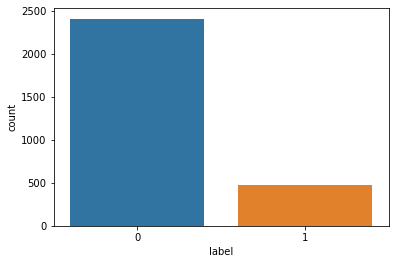

In [5]:
sns.countplot('label',data=sms)

In [6]:
#Ratio
print ('spam ratio = ', round(len(sms[sms['label']==1]) / len(sms.label),2)*100,'%')
print ('ham ratio  = ', round(len(sms[sms['label']==0]) / len(sms.label),2)*100,'%')

spam ratio =  17.0 %
ham ratio  =  83.0 %


In [7]:
#New column for Length of message and subject
sms['length_message'] = sms.message.str.len()
sms['length_subject'] = sms.subject.str.len()
sms.head()

,subject,message,label,length_message,length_subject
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856,39.0
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800,NaN
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435,50.0
3,risk,a colleague and i are researching the differin...,0,324,4.0
4,request book information,earlier this morning i was on the phone with a...,0,1046,24.0


In [8]:
sms.isnull().sum()

subject           62
message            0
label              0
length_message     0
length_subject    62
dtype: int64

In [9]:
# Let's replace empty subjects with 'Empty' and length as 0
sms['subject'].fillna("Empty",inplace=True)
sms['length_subject'].fillna(0,inplace=True)

<AxesSubplot:>

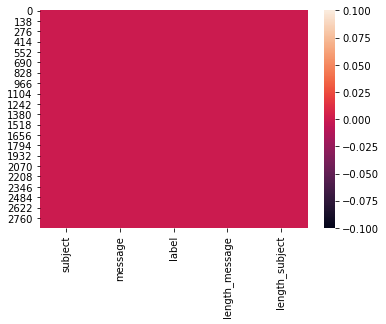

In [10]:
sns.heatmap(sms.isnull())

In [11]:
sms.head()

,subject,message,label,length_message,length_subject
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856,39.0
1,Empty,"lang classification grimes , joseph e . and ba...",0,1800,0.0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435,50.0
3,risk,a colleague and i are researching the differin...,0,324,4.0
4,request book information,earlier this morning i was on the phone with a...,0,1046,24.0


In [12]:
#Converting strings to lowercase
sms['message'] = sms['message'].str.lower()
sms['subject'] = sms['subject'].str.lower()

In [13]:
cols=['message','subject']
for j in cols:
    # Replace email addresses with 'email'
    sms[j] = sms[j].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')

    # Replace URLs with 'webaddress'
    sms[j] = sms[j].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

    # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
    sms[j] = sms[j].str.replace(r'£|\$', 'dollers')

    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    sms[j] = sms[j].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumber')


    # Replace numbers with 'numbr'
    sms[j] = sms[j].str.replace(r'\d+(\.\d+)?', 'numbr')

    # Remove punctuation
    sms[j] = sms[j].str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    sms[j] = sms[j].str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    sms[j] = sms[j].str.replace(r'^\s+|\s+?$', '')

In [14]:
sms.head()

,subject,message,label,length_message,length_subject
0,job posting apple iss research center,content length numbr apple iss research center...,0,2856,39.0
1,empty,lang classification grimes joseph e and barbar...,0,1800,0.0
2,query letter frequencies for text identification,i am posting this inquiry for sergei atamas sa...,0,1435,50.0
3,risk,a colleague and i are researching the differin...,0,324,4.0
4,request book information,earlier this morning i was on the phone with a...,0,1046,24.0


In [15]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

sms['message'] = sms['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

sms['subject'] = sms['subject'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [16]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
sms['message'] = sms['message'].apply(lambda x: tokenizer.tokenize(x.lower()))
sms['subject'] = sms['subject'].apply(lambda x: tokenizer.tokenize(x.lower()))
sms.head()

,subject,message,label,length_message,length_subject
0,"[job, posting, apple, iss, research, center]","[content, length, numbr, apple, iss, research,...",0,2856,39.0
1,[empty],"[lang, classification, grimes, joseph, e, barb...",0,1800,0.0
2,"[query, letter, frequencies, text, identificat...","[posting, inquiry, sergei, atamas, satamas, um...",0,1435,50.0
3,[risk],"[colleague, researching, differing, degrees, r...",0,324,4.0
4,"[request, book, information]","[earlier, morning, phone, friend, mine, living...",0,1046,24.0


In [29]:
# writing function for the entire dataset
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters

from nltk.stem import SnowballStemmer, WordNetLemmatizer
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [30]:
processed_docs_subject = []

for doc in sms.subject:
    processed_docs_subject.append(preprocess(doc))

In [32]:
print(len(processed_docs_subject))
processed_docs_subject[:3]

2893


[['job', 'post', 'appl', 'iss', 'research', 'center'],
 ['empti'],
 ['queri', 'letter', 'frequenc', 'text', 'identif']]

In [33]:
processed_docs_message = []

for doc in sms.message:
    processed_docs_message.append(preprocess(doc))

In [34]:
print(len(processed_docs_message))
processed_docs_message[:3]

2893


[['content',
  'length',
  'numbr',
  'appl',
  'iss',
  'research',
  'center',
  'doller',
  'numbr',
  'million',
  'joint',
  'ventur',
  'appl',
  'comput',
  'inc',
  'institut',
  'system',
  'scienc',
  'nation',
  'univers',
  'singapor',
  'locat',
  'singapor',
  'look',
  'senior',
  'speech',
  'scientist',
  'success',
  'candid',
  'research',
  'expertis',
  'comput',
  'linguist',
  'includ',
  'natur',
  'languag',
  'process',
  'english',
  'chines',
  'statist',
  'languag',
  'model',
  'knowledg',
  'state',
  'art',
  'corpus',
  'base',
  'gram',
  'languag',
  'model',
  'cach',
  'languag',
  'model',
  'part',
  'speech',
  'languag',
  'model',
  'requir',
  'text',
  'speech',
  'project',
  'leader',
  'success',
  'candid',
  'research',
  'expertis',
  'expertis',
  'two',
  'follow',
  'area',
  'comput',
  'linguist',
  'includ',
  'natur',
  'languag',
  'pars',
  'lexic',
  'databas',
  'design',
  'statist',
  'languag',
  'model',
  'text',
  'tok

In [43]:
sms['clean_subject']=processed_docs_subject
sms['clean_message']=processed_docs_message

In [56]:
sms['message'] = sms['clean_message'].apply(lambda x:' '.join(y for y in x))
sms['subject'] = sms['clean_subject'].apply(lambda x:' '.join(y for y in x))
sms['clean_length_subject']=sms.subject.str.len()
sms['clean_length_message']=sms.message.str.len()
sms['clean_length_subject'][sms['subject']=='empty']=0 # Changing subject lengths to 0 for empty subjects

In [57]:
sms.head()

,subject,message,label,length_message,length_subject,clean_subject,clean_message,clean_length_subject,clean_length_message
0,job post appl iss research center,content length numbr appl iss research center ...,0,2856,39.0,"[job, post, appl, iss, research, center]","[content, length, numbr, appl, iss, research, ...",33,1661
1,empti,lang classif grime joseph barbara grime ethnol...,0,1800,0.0,[empti],"[lang, classif, grime, joseph, barbara, grime,...",5,1252
2,queri letter frequenc text identif,post inquiri sergei atama satama umabnet umd e...,0,1435,50.0,"[queri, letter, frequenc, text, identif]","[post, inquiri, sergei, atama, satama, umabnet...",34,947
3,risk,colleagu research differ degre risk perceiv ho...,0,324,4.0,[risk],"[colleagu, research, differ, degre, risk, perc...",4,180
4,request book inform,earlier morn phone friend mine live south amer...,0,1046,24.0,"[request, book, inform]","[earlier, morn, phone, friend, mine, live, sou...",19,529


In [58]:
# Total length removal
print ('Original Length of message', sms.length_message.sum())
print ('Clean Length of message', sms.clean_length_message.sum())
print ('Original Length of subject', sms.length_subject.sum())
print ('Clean Length of subject', sms.clean_length_subject.sum())

Original Length of message 9344743
Clean Length of message 5680514
Original Length of subject 91663.0
Clean Length of subject 67148


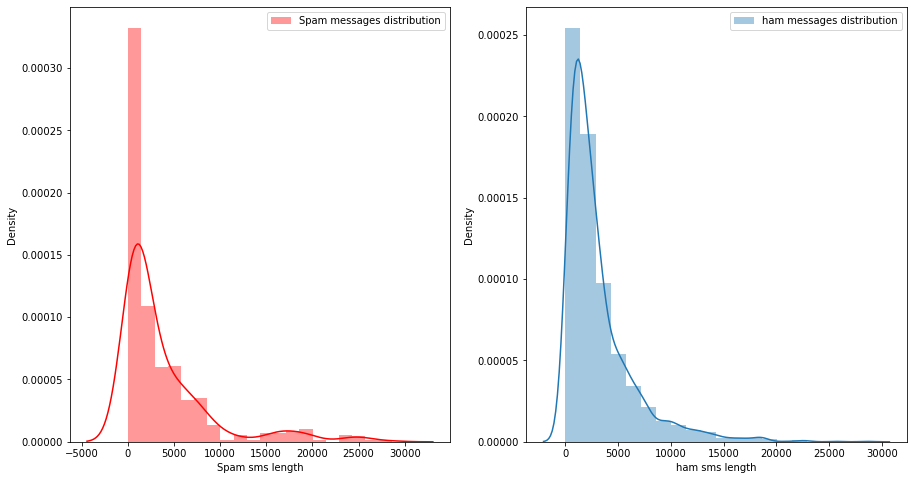

In [59]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(sms[sms['label']==1]['length_message'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['length_message'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

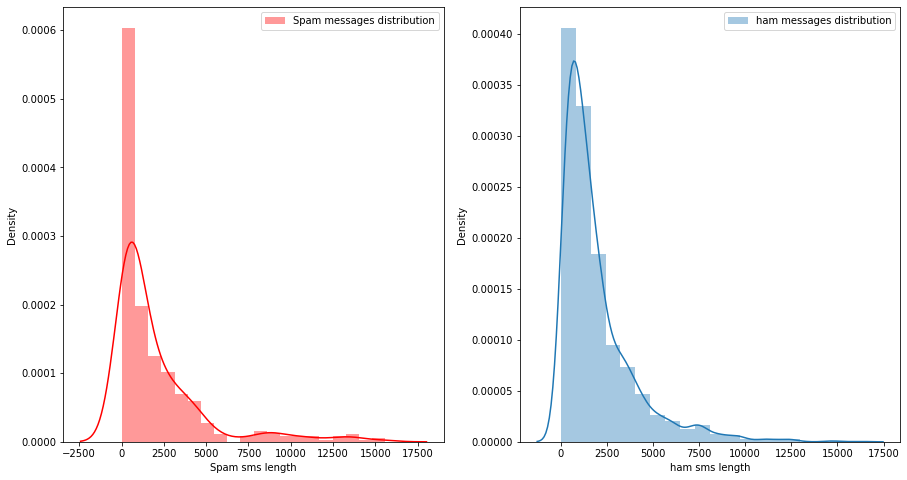

In [60]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(sms[sms['label']==1]['clean_length_message'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['clean_length_message'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

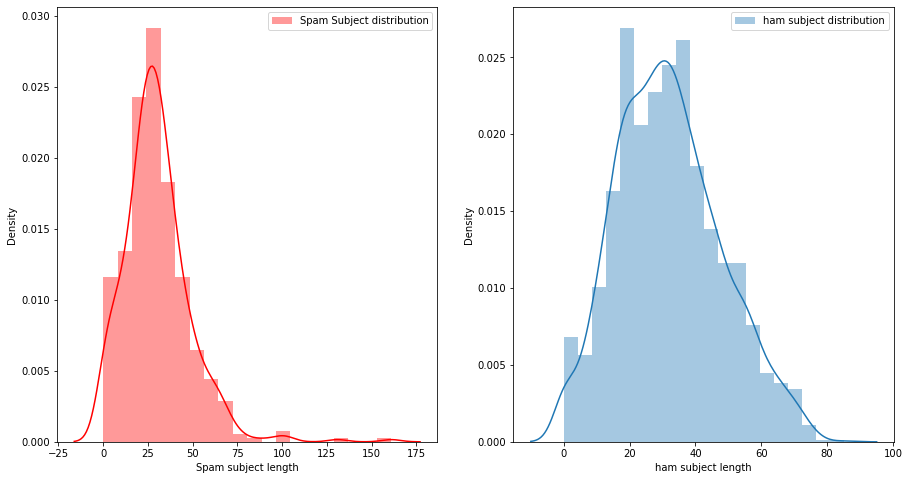

In [61]:
# Subject distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(sms[sms['label']==1]['length_subject'],bins=20,ax=ax[0],label='Spam Subject distribution',color='r')

ax[0].set_xlabel('Spam subject length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['length_subject'],bins=20,ax=ax[1],label='ham subject distribution')
ax[1].set_xlabel('ham subject length')
ax[1].legend()

plt.show()

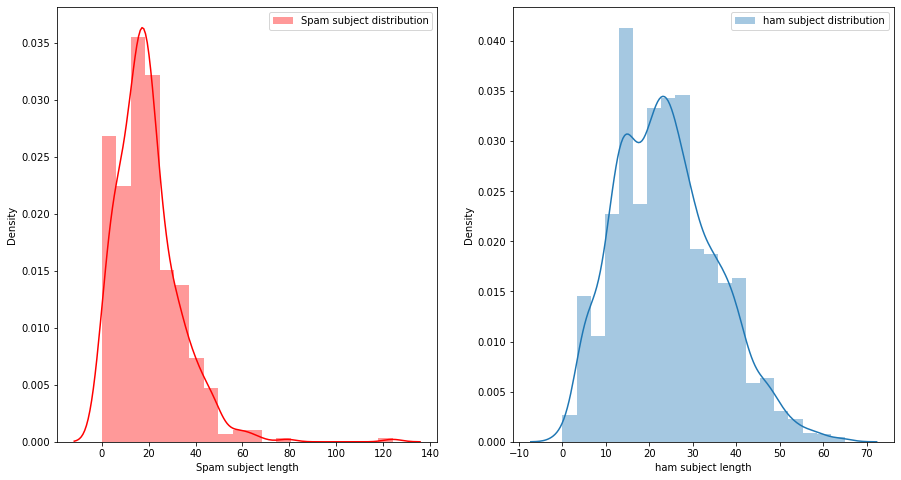

In [62]:
# Subject distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(sms[sms['label']==1]['clean_length_subject'],bins=20,ax=ax[0],label='Spam subject distribution',color='r')
ax[0].set_xlabel('Spam subject length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['clean_length_subject'],bins=20,ax=ax[1],label='ham subject distribution')
ax[1].set_xlabel('ham subject length')
ax[1].legend()

plt.show()

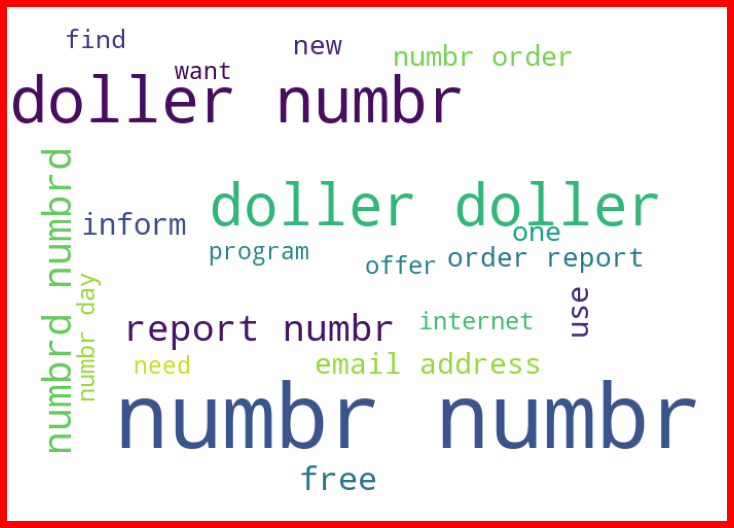

In [63]:
#Getting sense of loud words in spam messages
from wordcloud import WordCloud

spams = sms['message'][sms['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

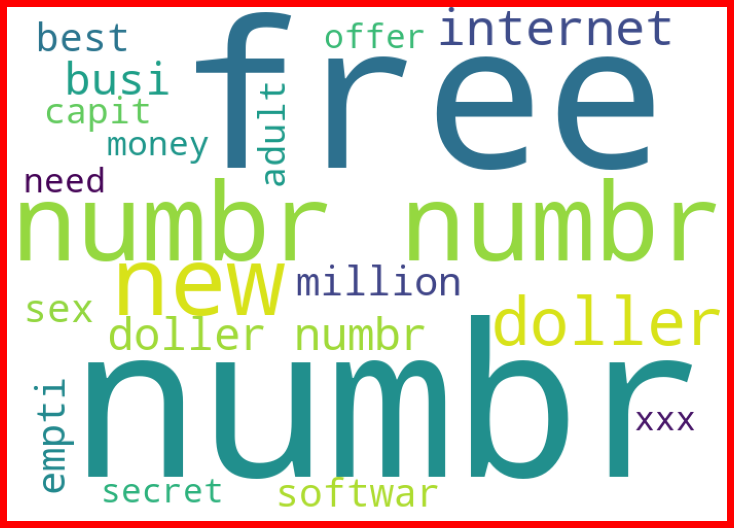

In [64]:
#Getting sense of loud words in spam subjects
from wordcloud import WordCloud

spams = sms['subject'][sms['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [66]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier, SGDClassifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(sms['subject'] + sms['message'])

X = features
y = sms['label']
X.shape

(2893, 45239)

In [67]:
# Train and test splitting
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

In [68]:
# Naive Bayes 
naive = MultinomialNB()
naive.fit(X_train,Y_train)
y_pred= naive.predict(x_test)

print ('Accuracy = > ', accuracy_score(y_test,y_pred)*100)

Accuracy = >  82.18232044198895


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       585
           1       1.00      0.07      0.13       139

    accuracy                           0.82       724
   macro avg       0.91      0.54      0.52       724
weighted avg       0.85      0.82      0.75       724



In [70]:
#confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[585,   0],
       [129,  10]], dtype=int64)

In [71]:
# SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_train,Y_train)
y_pred_sgd= sgd.predict(x_test)

print ('Accuracy = > ', accuracy_score(y_test,y_pred_sgd)*100)

Accuracy = >  99.17127071823204


In [73]:
print(classification_report(y_test, y_pred_sgd))
#confusion matrix

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       585
           1       0.99      0.96      0.98       139

    accuracy                           0.99       724
   macro avg       0.99      0.98      0.99       724
weighted avg       0.99      0.99      0.99       724



In [74]:
#confusion matrix
conf_mat = confusion_matrix(y_test,y_pred_sgd)
conf_mat

array([[584,   1],
       [  5, 134]], dtype=int64)

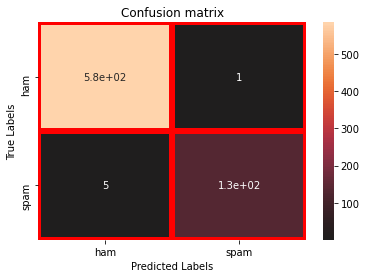

In [75]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred_sgd)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

# Selected Model SGDClassifier with 99.17% accuracy and f1 score of 98%